In [1]:
%run "Eigendecomposition_Source_Code.ipynb"

Loading: Eigendecomposition_Source_Code.ipynb...
Done at: 2023/08/17 13:41:52


In [2]:
import pickle
file = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
stitched_data = pickle.load(file)
file.close()

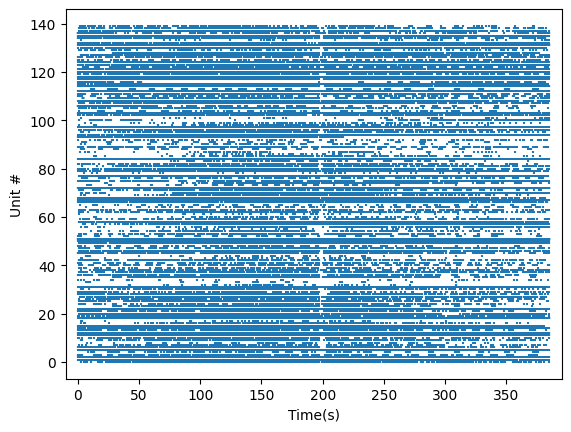

In [31]:
plot_raster(stitched_data)

In [ ]:

corr = correlation(stitched_data)
sttc = get_sttc(stitched_data)
eigenvalues_eigenvectors(corr)
eigenvalues_eigenvectors(corr)
randomPlots(Ucorr, Usttc, Ut, RUcorr, RUsttc, RUt, methodRand)

In [43]:
def EigenLayoutsDisplay(sd, showamount=5):
    corr = correlation(sd)
    sttc = get_sttc(sd)
    Wcorr, Ucorr = eigenvalues_eigenvectors(corr)
    Wsttc, Usttc = eigenvalues_eigenvectors(sttc)
    
    #firing_rates = calculate_mean_firing_rates(sd)
    
    neuron_x = []
    neuron_y = []
    
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        
    figs, axs = plt.subplots(nrows=2,ncols=showamount,figsize=(12*showamount,12))
    figs.suptitle("First Five Eigenvector Layouts")
    
    for i in range(showamount):
        pltA = axs[0,i].scatter(neuron_x,neuron_y, c=Ucorr[:,i], cmap = plot_color)
        #pltA = axs[0,i].scatter(neuron_x,neuron_y, s=firing_rates*20, c=Ucorr[:,i], cmap = plot_color)
        axs[0,i].set_title(f"Corr Eigenvector #{i+1}")
        axs[0,i].set_xlabel("um")
        axs[0,i].set_ylabel("um")
        axs[0,i].set_facecolor("grey")
        figs.colorbar(pltA, ax=axs[0,i], label="Eigen component value")
        
        pltB = axs[1,i].scatter(neuron_x,neuron_y, c=Usttc[:,i], cmap = plot_color)
        #pltB = axs[1,i].scatter(neuron_x,neuron_y, s=firing_rates*20, c=Usttc[:,i], cmap = plot_color)
        axs[1,i].set_title(f"STTC Eigenvector #{i+1}")
        axs[1,i].set_xlabel("um")
        axs[1,i].set_ylabel("um")
        axs[1,i].set_facecolor("grey")
        figs.colorbar(pltB, ax=axs[1,i], label="Eigen component value")
        

/tmp/ipykernel_1847145/1658592277.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


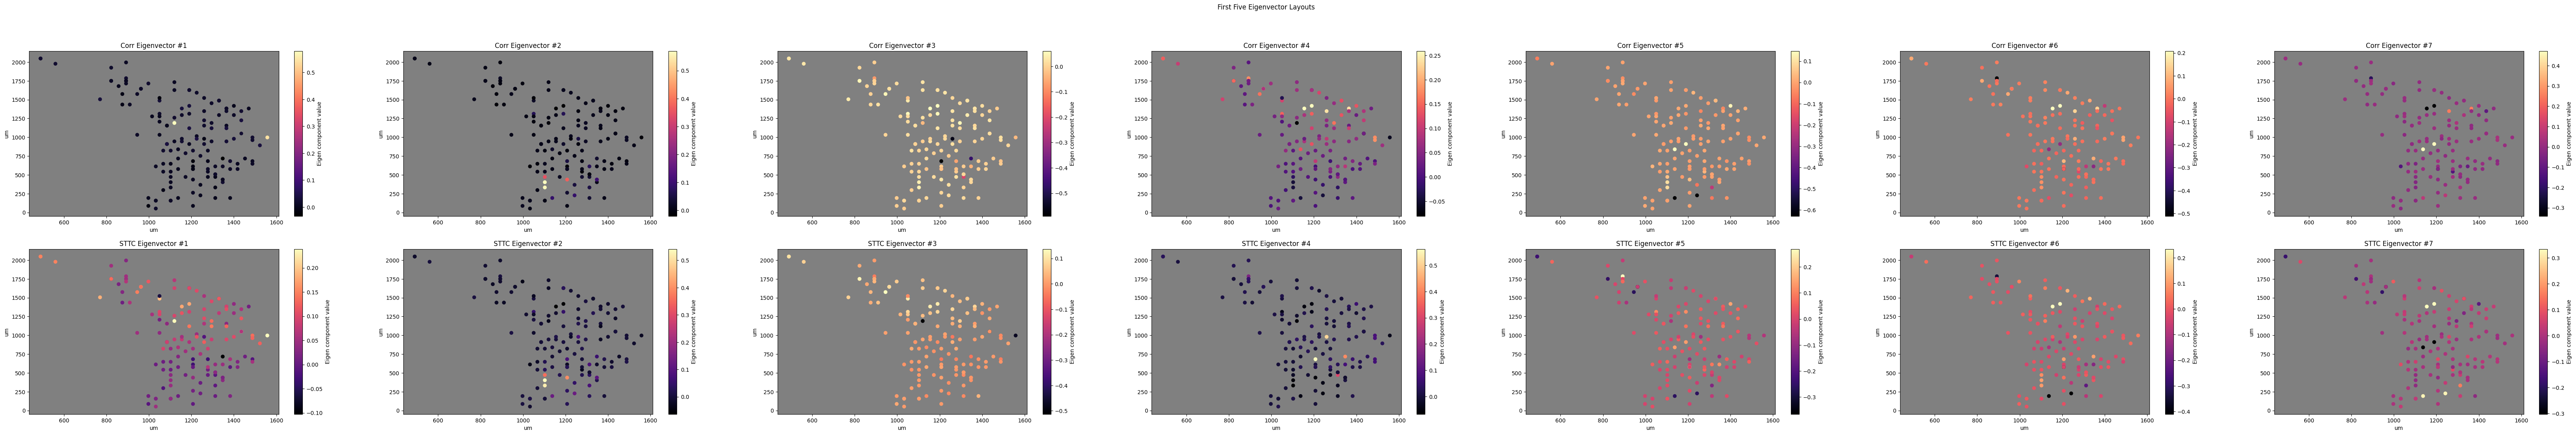

In [44]:
EigenLayoutsDisplay(stitched_data, showamount=7)